In [8]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

%matplotlib widget



def compute_everything(length, min_outlier, max_outlier):
    a = np.random.normal(0,1, size=length)
    
    N_outliers = random.randint(0,round(length/2))
    
    for n in range(N_outliers):
        b = np.random.uniform(min_outlier,max_outlier)
        outlier_position = random.randint(0,length-1)
        a[outlier_position] = b
    
    true_mean = np.sum(a)/len(a)
    
    
    
    #print(a)
    print(f"Lenght is {length:.0f}\n")
    print(f"Number of outliers (uniform between {min_outlier:.0f} and {max_outlier:.0f}) is {N_outliers:.0f}\n")
    
    resamples_size = round(length/10)
    resample = np.zeros(length,dtype=float)
    
    bootstrapped_means = []
    N_bootstraps = 10000
    
    
    for n in range(N_bootstraps):
    
        for i in range(resamples_size):
            o = random.randint(0,length-1)
            resample[i] = a[o] 
            #print(resample)
        mu_boot = np.sum(resample)/resamples_size
            
        bootstrapped_means.append(mu_boot)
        #print(f"Bootstrapped mean is {mu_boot:.3f}\n")
    
    bootstrap_mu = np.sum(bootstrapped_means)/len(bootstrapped_means)
    bootstraps_sigma = np.std(bootstrapped_means)
    
    
    
    plt.figure(figsize=(10, 6))
    
    plt.hist(bootstrapped_means, bins=10000, range=(np.min(bootstrapped_means)-0.005,np.max(bootstrapped_means)+0.005), alpha=0.6, label="Bootstrapped µ")
    
    
    #plt.yscale("log")
    plt.xlabel(f"Sample means with {N_bootstraps:.0f} bootstraps of size {round(length/10):.0f}")
    plt.ylabel("Counts")
    plt.title(f"Sample means from bootrstrapped Normal Gaussian sample (size {length:.0f})\n{N_outliers:.0f} outliers (uniform between {min_outlier:.0f} and {max_outlier:.0f}) ")
    
    plt.axvline(bootstrap_mu, color='mediumorchid', linestyle="--", alpha=0.6, label='Bootstraps Mean')
    plt.axvspan(bootstrap_mu-1.96*bootstraps_sigma, bootstrap_mu+1.96*bootstraps_sigma, color='hotpink', alpha=0.1)
    
    plt.axvline(true_mean, color='darkorange', linestyle="--", alpha=0.6, label='Population Mean')
    
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
               
            
    
    print(f"The bootstrapped mean is {bootstrap_mu:.6f}, 95% C.I. is [{bootstrap_mu-1.96*bootstraps_sigma:.3f},{bootstrap_mu+1.96*bootstraps_sigma:.3f}]\n")
    print(f"Population mean is {true_mean:.6f}\n\n")
    return 







Lenght is 22785

Number of outliers (uniform between -3 and 2) is 3610



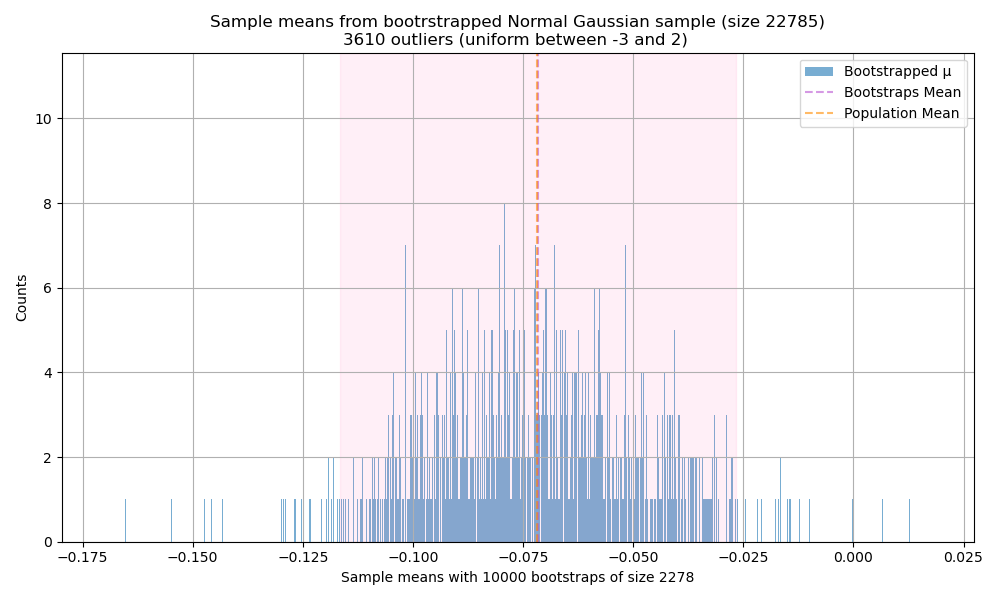

The bootstrapped mean is -0.071620, 95% C.I. is [-0.117,-0.027]

Population mean is -0.071926




In [10]:
length = random.randint(1, 50000)
min_out = random.randint(-3,-1)
max_out = random.randint(1,3)
compute_everything(length, min_out, max_out)

Lenght is 100

Number of outliers (uniform between 0 and 1) is 18



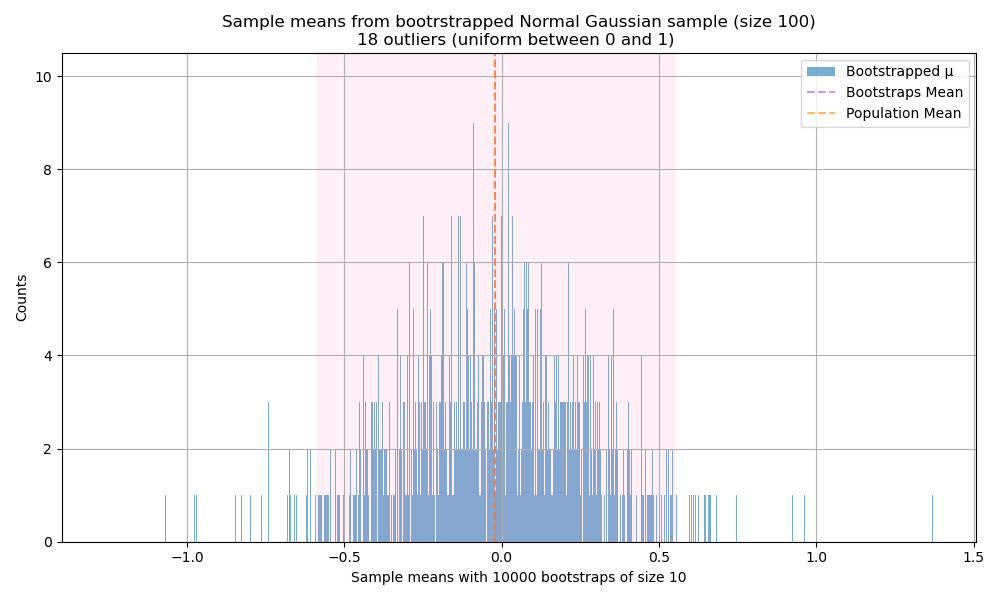

The bootstrapped mean is -0.019756, 95% C.I. is [-0.588,0.548]

Population mean is -0.020931


Lenght is 10000

Number of outliers (uniform between 0 and 1) is 4338



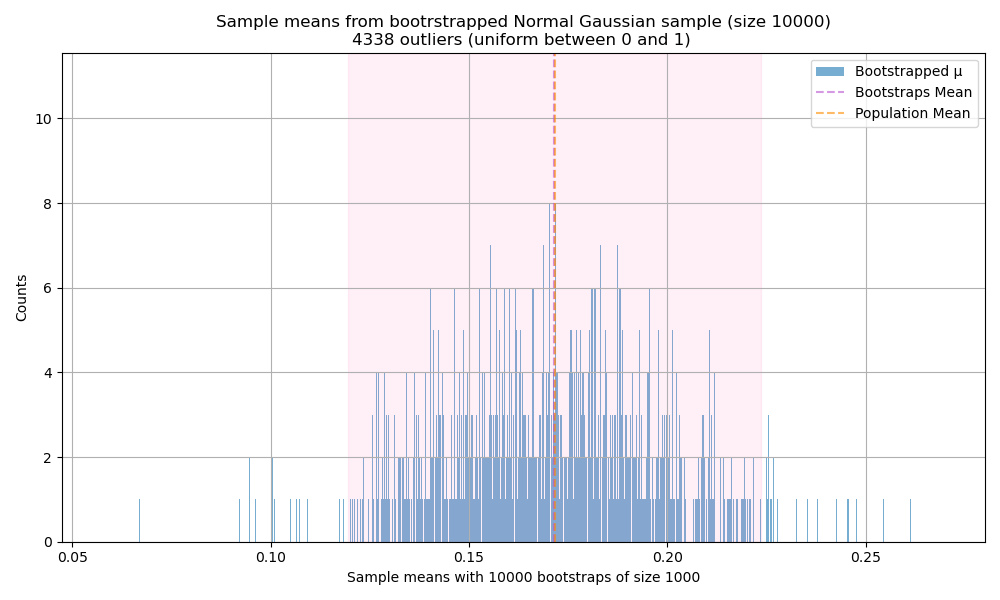

The bootstrapped mean is 0.171542, 95% C.I. is [0.119,0.224]

Population mean is 0.171629


Lenght is 100000

Number of outliers (uniform between 0 and 1) is 3382



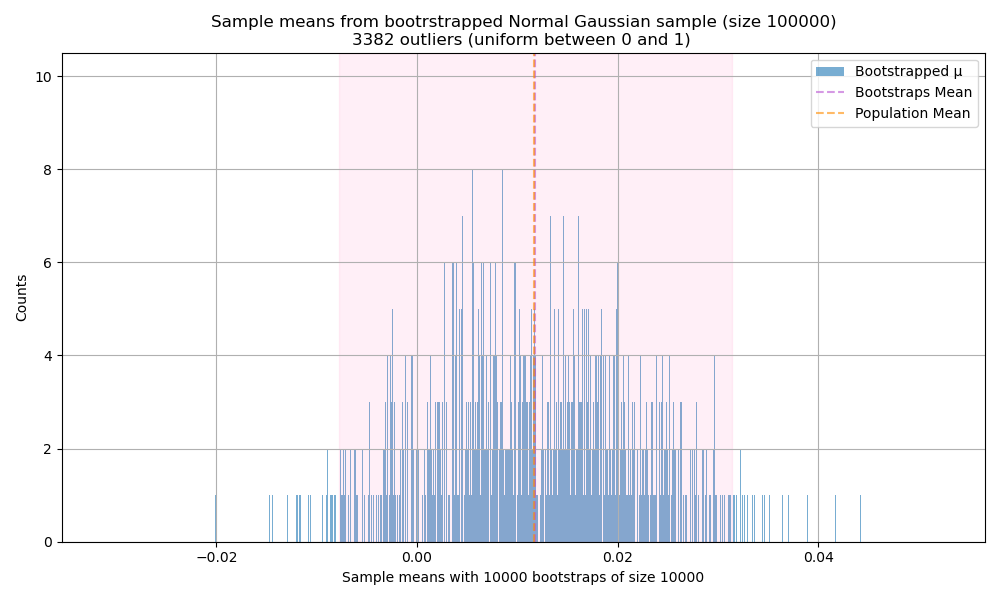

The bootstrapped mean is 0.011811, 95% C.I. is [-0.008,0.031]

Population mean is 0.011714




In [11]:
lengths = ([100, 10000, 100000])   # Sample size is one tenth of the population
for k in range(len(lengths)):
    compute_everything(lengths[k],0,1)